In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
spy_data = pd.read_csv('SPY_regression.csv')
spy_data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
#change date column to datetime

spy_data['Date'] = pd.to_datetime(spy_data['Date'])
spy_data.head(4)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010


In [4]:
# Set date as index and ascending order

spy_data.set_index('Date',inplace=True)

spy_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117


In [14]:
spy_data['High-Low_pct'] = (spy_data['High']-spy_data['Low']).pct_change()

spy_data['ewm_5'] = spy_data['Close'].ewm(span=5).mean().shift(periods=1)

spy_data['price_std_5'] = spy_data['Close'].rolling(center=False,window=30).std().shift(periods=1)

spy_data['volume Change'] = spy_data['Volume'].pct_change()

#spy_data['volume_avg_5'] = spy_data['Volume'].rolling(center=False,window=5)

#spy_data['volume Close'] = spy_data['Volume'].rolling(center=False,window=5)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

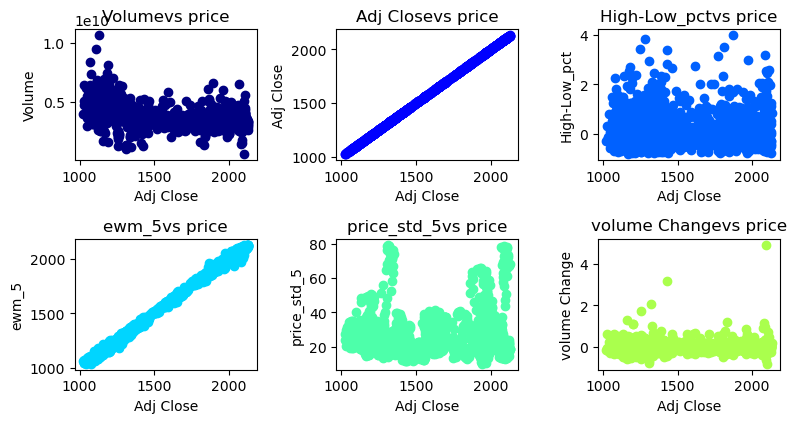

In [6]:
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables,n_rows,n_cols):
    fig = plt.figure(figsize=(8,6))
    
    for i,var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df['Adj Close'],asset,c= next(colors))
        ax.set_xlabel('Adj Close')
        ax.set_ylabel('{}'.format(var))
        ax.set_title(var+'vs price')
    fig.tight_layout()
    plt.show()
    
variables = spy_data.columns[-6:]
correlation(spy_data,variables,3,3)

In [7]:
spy_data.corr()['Adj Close'].loc[variables]

Volume          -0.408814
Adj Close        1.000000
High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
Name: Adj Close, dtype: float64

In [10]:
spy_data.isnull().sum().loc[variables]

Volume           0
Adj Close        0
High-Low_pct     0
ewm_5            0
price_std_5      0
volume Change    0
dtype: int64

In [9]:
#drop missing value

spy_data = spy_data.dropna(axis=0)

In [11]:
train = spy_data[spy_data.index < datetime(year=2015,month=1,day=1)]
test = spy_data[spy_data.index >= datetime(year=2015,month=1,day=1)]
dates = test.index

In [15]:
lr = LinearRegression()
x_train = train[['High-Low_pct','ewm_5','price_std_5','volume Change']]

y_train = train['Adj Close']

lr.fit(x_train,y_train)

LinearRegression()

In [16]:
x_test = test[['High-Low_pct','ewm_5','price_std_5','volume Change']].values

y_test = test['Adj Close'].values

In [18]:
close_predictions = lr.predict(x_test)

mae = sum(abs(close_predictions - test['Adj Close'].values)) / test.shape[0]
print(mae)

18.29702085948143


C:\Users\malik bros\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\malik bros\AppData\Local\Temp\ipykernel_5136\2432996353.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')


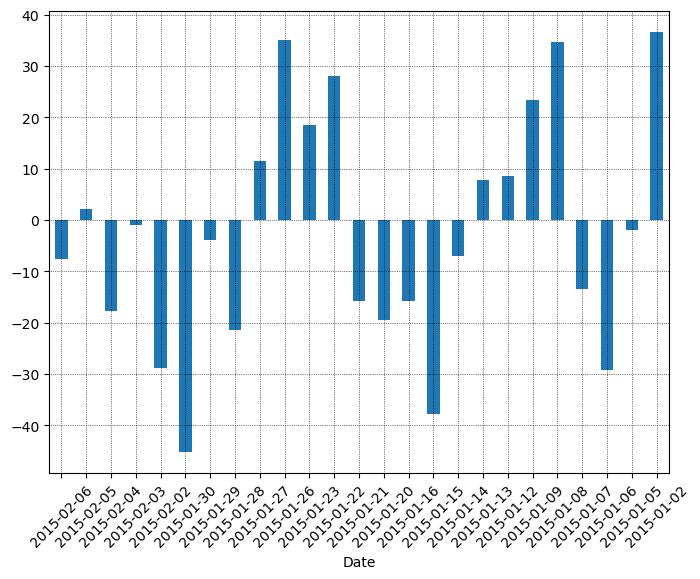

In [23]:
#actual and predicted values

df = pd.DataFrame({'Date':dates,'Actual':y_test,'Prediction':close_predictions})
df1 = df.tail(25)

#set date with string formate for plotting

df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

df1.set_index('Date',inplace=True)

error = df1['Actual'] - df1['Prediction']

error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='black')
plt.xticks(rotation=45)
plt.show()